# Support vector machines

Code by Michael Shaham for Northeastern's intro machine learning course.

In [1]:
import copy
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(16)

## Least squares classification

Line 1:  
$$x_2 = 2x_1 \implies x_1 - x_2 = 0 \implies w_1^T x = b_1,\ w_1 = (2, -1),\ b_1 = 0$$

Line 2:  
$$x_2 = 2x_1 - 8 \implies x_1 - x_2 = 8 \implies w_2^T x = b_2,\ w_2 = (2, -1),\ b_2 = 8$$

Ideal separator:  
$$w^T x = b,\ w = (2, -1),\ b = 4$$

### The data

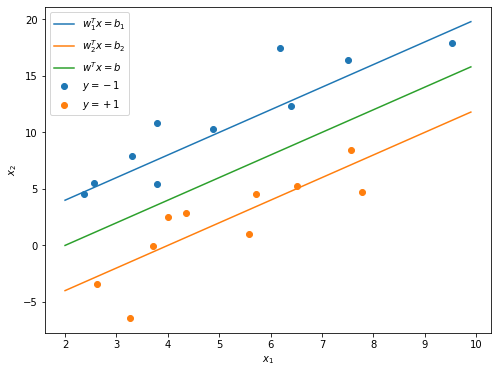

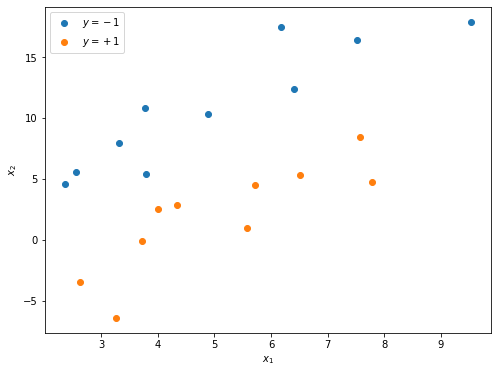

In [2]:
# we'll generate data from the two lines given above

x_1_range = np.arange(2, 10, .1)
x_2_l1 = 2*x_1_range
x_2_l2 = 2*x_1_range - 8
x_2_sep = 2*x_1_range - 4

plt.figure(figsize=(8, 6))
plt.plot(x_1_range, x_2_l1, label=r"$w_1^Tx = b_1$")
plt.plot(x_1_range, x_2_l2, label=r"$w_2^Tx = b_2$")
plt.plot(x_1_range, x_2_sep, label=r"$w^Tx = b$")

# generate some data points from each line with noise

m_1 = 10
m_2 = 10
m = m_1 + m_2
# first m_1 data points belong to line 1 (y = -1), rest to line 2 (y = +1)
x_1_data = 2 + 8*np.random.rand(m)
x_2_data = np.r_[2*x_1_data[:m_1] + 2*np.random.randn(m_1), 
                 2*x_1_data[m_1:] - 8 + 2*np.random.randn(m_2)]
y_data = np.r_[-1*np.ones(m_1), np.ones(m_2)]

plt.scatter(x_1_data[:m_1], x_2_data[:m_1], label=r"$y=-1$")
plt.scatter(x_1_data[m_1:], x_2_data[m_1:], label=r"$y=+1$")
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

plt.show();

plt.figure(figsize=(8, 6))
plt.scatter(x_1_data[:m_1], x_2_data[:m_1], label=r"$y=-1$")
plt.scatter(x_1_data[m_1:], x_2_data[m_1:], label=r"$y=+1$")
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
# plt.savefig("figures/svm_raw_2d_data.png", bbox_inches='tight')
plt.show();

### Case 1: no outliers

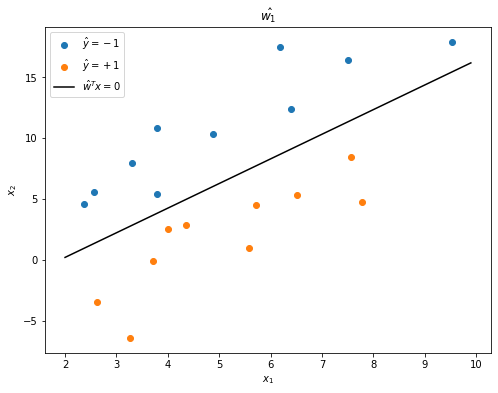

In [3]:
# create data matrices/vectors
X = np.c_[x_1_data, x_2_data, np.ones(m)]
y = copy.deepcopy(y_data)

# find least squares classifier
w_no_out = np.linalg.inv(X.T @ X) @ X.T @ y

# make predictions:
y_hat = np.sign(X @ w_no_out)
l1_inds = y_hat == -1
l2_inds = y_hat == 1

plt.figure(figsize=(8, 6))

# plot data and predictions
plt.scatter(X[l1_inds, 0], X[l1_inds, 1], label=r"$\hat{y} = -1$")
plt.scatter(X[l2_inds, 0], X[l2_inds, 1], label=r"$\hat{y} = +1$")

# plot optimal decision boundary
w_1, w_2, w_0 = w_no_out
x_1_opt = copy.deepcopy(x_1_range)
x_2_no_out = (-w_0 - w_1*x_1_opt) / w_2
plt.plot(x_1_opt, x_2_no_out, 'k-', label=r"$\hat{w}^T x = 0$")

plt.title(r"$\hat{w_1}} = (%.2f, %.2f),\ \hat{w_0} = %.2f$" % (w_1, w_2, w_0))
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# plt.savefig("figures/svm_2d_opt_no_outliers.png", bbox_inches='tight')
plt.show();

### Case 2: outliers

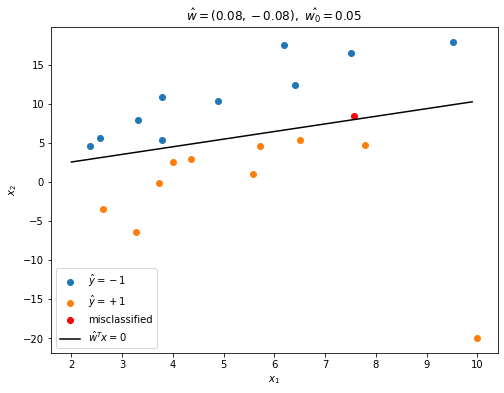

In [4]:
# add an outlier data point to data with label +1
X_out = np.r_[X, np.array([[10, -20, 1]])]
y = np.r_[y, 1]
m = len(y)

plt.figure(figsize=(8, 6))

# find least squares classifier
w_out = np.linalg.inv(X_out.T @ X_out) @ X_out.T @ y

# make predictions:
y_hat = np.sign(X_out @ w_out)
correct_inds = y_hat == y
incorrect_inds = correct_inds == False
l1_preds = y_hat == -1
l2_preds = y_hat == 1

# plot data and predictions
plt.scatter(X_out[correct_inds, 0][:m_1], X_out[correct_inds, 1][:m_1], label=r"$\hat{y} = -1$")
plt.scatter(X_out[correct_inds, 0][m_1:], X_out[correct_inds, 1][m_1:], label=r"$\hat{y} = +1$")
plt.scatter(X_out[incorrect_inds, 0], X_out[incorrect_inds, 1], c='red', label="misclassified")

# plot optimal decision boundary
w_1, w_2, w_0 = w_out
x_1_opt = copy.deepcopy(x_1_range)
x_2_out = (-w_0 - w_1*x_1_opt) / w_2
plt.plot(x_1_opt, x_2_out, 'k-', label=r"$\hat{w}^T x = 0$")

plt.title(r"$\hat{w} = (%.2f, %.2f),\ \hat{w_0} = %.2f$" % (w_1, w_2, w_0))
plt.legend(loc="lower left")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# plt.savefig("figures/svm_2d_opt_outliers.png", bbox_inches='tight')
plt.show();

### Quick aside: $l_1$ vs $l_2$ vs $l_\infty$ regression

In [5]:
# solve l2 problem

m = X_out.shape[0]
n = X_out.shape[1]

# solved for least squares problem above already
w_l2 = w_out

In [6]:
# solve l1 problem (sum of absolute residuals approximation or robust estimation)

# show equivalence of the two problems
w_1 = cp.Variable(n)
loss_1 = cp.norm1(X_out @ w_1 - y)
prob_1 = cp.Problem(cp.Minimize(loss_1))
prob_1.solve()
w_1 = w_1.value

w_2 = cp.Variable(n)
t = cp.Variable(m)
loss_2 = cp.sum(t)
constraints = [X_out @ w_2 - y <= t,
               X_out @ w_2 - y >= -t]
prob_2 = cp.Problem(cp.Minimize(loss_2), constraints)
prob_2.solve()
w_2 = w_2.value

print((w_1 == w_2).all())
w_l1 = w_1

True


In [7]:
# solve l_inf problem (Chebyshev/minimax)

# show equivalence of the two problems
w_1 = cp.Variable(n)
loss_1 = cp.norm(X_out @ w_1 - y, p='inf')
prob_1 = cp.Problem(cp.Minimize(loss_1))
prob_1.solve()
w_1 = w_1.value

w_2 = cp.Variable(n)
t = cp.Variable()
loss_2 = t
constraints = [X_out @ w_2 - y <= t * np.ones(m),
               X_out @ w_2 - y >= -t * np.ones(m)]
prob_2 = cp.Problem(cp.Minimize(loss_2), constraints)
prob_2.solve()
w_2 = w_2.value

print((w_1 == w_2).all())
w_l_inf = w_1

True


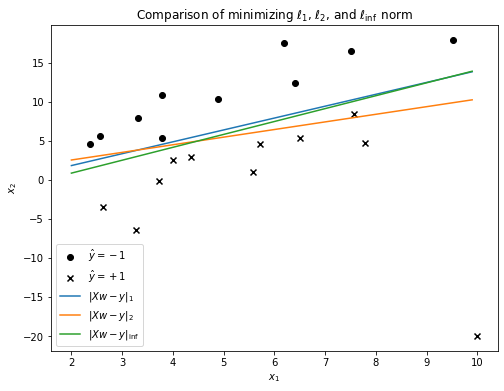

In [8]:
plt.figure(figsize=(8, 6))

plt.scatter(X_out[:m_1, 0], X_out[:m_1, 1], c='black', marker='o', label=r"$\hat{y} = -1$")
plt.scatter(X_out[m_1:, 0], X_out[m_1:, 1], c='black', marker='x', label=r"$\hat{y} = +1$")

# plot optimal decision boundary
w_vals = [w_l1, w_l2, w_l_inf]
norms = ["1", "2", "\inf"]
for w, n in zip(w_vals, norms):
    w_1, w_2, w_0 = w
    x_2_vals = (-w_0 - w_1*x_1_range) / w_2
    plt.plot(x_1_range, x_2_vals, label=r"$\|X w - y\|_{}$".format(n))
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")
plt.title(r"Comparison of minimizing $\ell_1$, $\ell_2$, and $\ell_\inf$ norm")
plt.legend()
plt.show();

## The basic SVM: minimization using the hinge loss

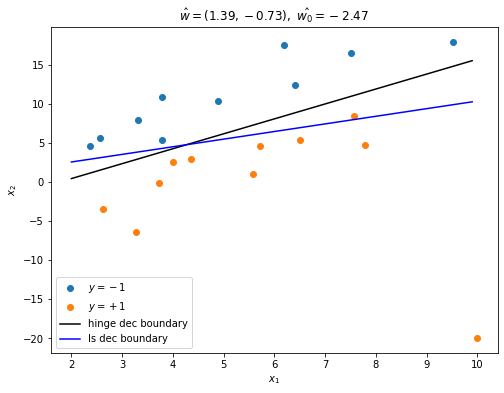

In [9]:
# set up cvx opt problem
n = X_out.shape[1]
w_hinge = cp.Variable((n, 1))
loss = cp.sum(cp.pos(1 - cp.multiply(y, (X_out @ w_hinge).flatten())))
prob = cp.Problem(cp.Minimize(loss))
prob.solve()

w_1, w_2, w_0 = w_hinge.value
x_2_hinge = (-w_0 - w_1*x_1_range) / w_2

plt.figure(figsize=(8, 6))
plt.scatter(X_out[:m_1, 0], X_out[:m_1, 1], label=r"$y=-1$")
plt.scatter(X_out[m_1:, 0], X_out[m_1:, 1], label=r"$y=+1$")
plt.plot(x_1_range, x_2_hinge, 'k-', label="hinge dec boundary")
plt.plot(x_1_opt, x_2_out, 'b-', label="ls dec boundary")

plt.title(r"$\hat{w} = (%.2f, %.2f),\ \hat{w_0} = %.2f$" % (w_1, w_2, w_0))
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# plt.savefig("figures/svm_2d_hinge_comp.png", bbox_inches='tight')
plt.show();

## Maximum margin classification

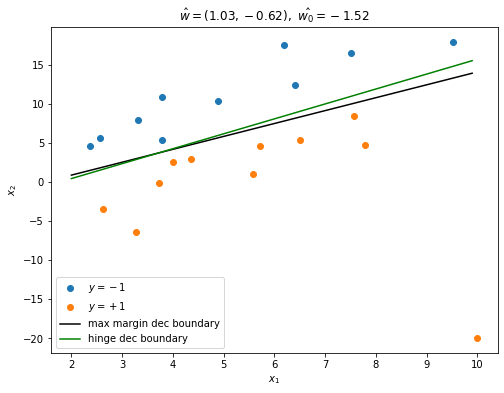

In [10]:
# set up cvx opt problem
w_mm = cp.Variable((n, 1))
loss = cp.norm2(w_mm[:2])**2
constraints = [1 - cp.multiply(y, (X_out @ w_mm).flatten()) <= 0]
prob = cp.Problem(cp.Minimize(loss), constraints)
prob.solve()

w_1, w_2, w_0 = w_mm.value
x_2_mm = (-w_0 - w_1*x_1_range) / w_2

plt.figure(figsize=(8, 6))
plt.scatter(X_out[:m_1, 0], X_out[:m_1, 1], label=r"$y=-1$")
plt.scatter(X_out[m_1:, 0], X_out[m_1:, 1], label=r"$y=+1$")
plt.plot(x_1_range, x_2_mm, 'k-', label="max margin dec boundary")
plt.plot(x_1_range, x_2_hinge, 'g-', label="hinge dec boundary")
# plt.plot(x_1_opt, x_2_out, 'b-', label="ls dec boundary")

plt.title(r"$\hat{w} = (%.2f, %.2f),\ \hat{w_0} = %.2f$" % (w_1, w_2, w_0))
plt.legend(loc='lower left')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# plt.savefig("figures/svm_2d_max_margin.png", bbox_inches='tight')
plt.show();

## The support vector machine

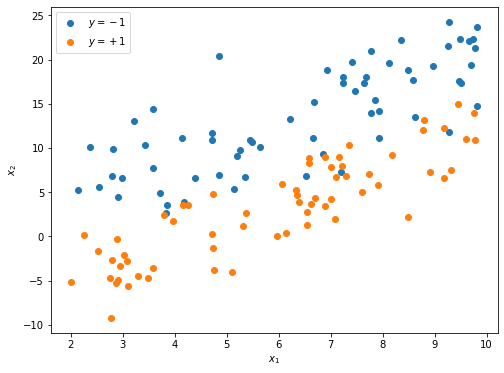

In [11]:
# generate overlapping data

x_1_range = np.arange(2, 10, .1)
x_2_l1 = 2*x_1_range
x_2_l2 = 2*x_1_range - 8

# generate some data points from each line with noise

m_1 = 64
m_2 = 64
m = m_1 + m_2
# first m_1 data points belong to line 1 (y = -1), rest to line 2 (y = +1)
x_1_data = 2 + 8*np.random.rand(m)
noise = 4
x_2_data = np.r_[2*x_1_data[:m_1] + noise*np.random.randn(m_1), 
                 2*x_1_data[m_1:] - 8 + noise*np.random.randn(m_2)]
X = np.c_[x_1_data, x_2_data, np.ones_like(x_1_data)]
y = np.r_[-1*np.ones(m_1), np.ones(m_2)]

plt.figure(figsize=(8, 6))
plt.scatter(x_1_data[:m_1], x_2_data[:m_1], label=r"$y=-1$")
plt.scatter(x_1_data[m_1:], x_2_data[m_1:], label=r"$y=+1$")
plt.legend()
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# plt.savefig("figures/svm_2d_overlap_toy_data.png", bbox_inches='tight')
plt.show();

[[ 0.02833233]
 [-0.11138694]
 [ 0.79336544]]
lambda = 0.001, number correct = 101
lambda = 1000.0, number correct = 119


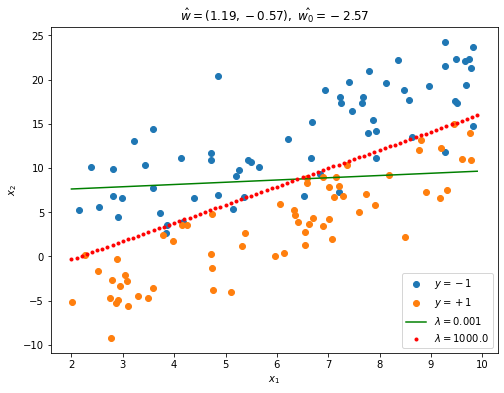

In [12]:
# solve using slack variable formulation

lam_1 = 1e-3
w_svm1 = cp.Variable((n, 1))
eps1 = cp.Variable((m, 1))
loss1 = cp.norm2(w_svm1[:2])**2 + \
        lam_1*cp.sum(eps1)
constraints_1 = [1 - cp.vec(eps1) <= cp.multiply(y, (X @ w_svm1).flatten()),
                eps1 >= 0]
prob_1 = cp.Problem(cp.Minimize(loss1), constraints_1)
prob_1.solve()

print(w_svm1.value)
w_1, w_2, w_0 = w_svm1.value
x_2_svm1 = (-w_0 - w_1*x_1_range) / w_2

# solve using the hinge loss formulation

lam_2 = 1e3

w_svm2 = cp.Variable((n, 1))
loss2 = cp.norm2(w_svm2[:2])**2 + \
        lam_2*cp.sum(cp.pos(1 - cp.multiply(y, (X @ w_svm2).flatten())))
prob_2 = cp.Problem(cp.Minimize(loss2))
prob_2.solve()

w_1, w_2, w_0 = w_svm2.value
x_2_svm2 = (-w_0 - w_1*x_1_range) / w_2

y_hat_1 = np.sign(X @ w_svm1.value).flatten()
correct_1 = np.count_nonzero(np.int64(y_hat_1 == y))
print("lambda = {}, number correct = {}".format(lam_1, correct_1))

y_hat_2 = np.sign(X @ w_svm2.value).flatten()
correct_2 = np.count_nonzero(np.int64(y_hat_2 == y))
print("lambda = {}, number correct = {}".format(lam_2, correct_2))

plt.figure(figsize=(8, 6))
plt.scatter(X[:m_1, 0], X[:m_1, 1], label=r"$y=-1$")
plt.scatter(X[m_1:, 0], X[m_1:, 1], label=r"$y=+1$")
plt.plot(x_1_range, x_2_svm1, 'g-', label=r"$\lambda={}$".format(lam_1))
plt.plot(x_1_range, x_2_svm2, 'r.', label=r"$\lambda={}$".format(lam_2))

plt.title(r"$\hat{w} = (%.2f, %.2f),\ \hat{w_0} = %.2f$" % (w_1, w_2, w_0))
plt.legend(loc='lower right')
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

# plt.savefig("figures/svm_2d_overlap.png", bbox_inches='tight')
plt.show();